# **1. Objective**

**The objective of this article is to predict flight prices given the various parameters. Data used in this article is publicly available at Kaggle. This will be a regression problem since the target or dependent variable is the price (continuous numeric value)**

# **2. Introduction**

**Airline companies use complex algorithms to calculate flight prices given various conditions present at that particular time. These methods take financial, marketing, and various social factors into account to predict flight prices.**

**Nowadays, the number of people using flights has increased significantly. It is difficult for airlines to maintain prices since prices change dynamically due to different conditions. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. It can also help customers to predict future flight prices and plan their journey accordingly**

# **3. Data Used**

**Data was used from Kaggle which is a freely available platform for data scientists and machine learning enthusiasts.**

**Source: https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh**

# **4. Data Analysis**

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading dataset

df = pd.read_excel(r'C:\Users\User\Desktop\Data_Train.xlsx')

In [2]:
# Checking the dataset

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# Concise summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**Insight : 
<br>• Number of variables = 11
<br>• Number of rows = 10683
<br>• Number of categorical type of feature = 10
<br>• Number of numerical type of feature = 1**

In [4]:
#Checking for null values

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

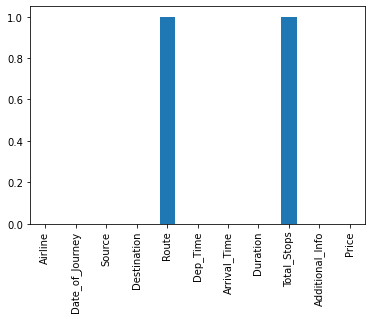

In [5]:
# Displaying null values in bar graph

df.isnull().sum().plot(kind='bar')

**Insight : As we can see there are missing values in 'Route' and 'Total_Stops' features**

In [6]:
# Dropping missing values

df.dropna(inplace= True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

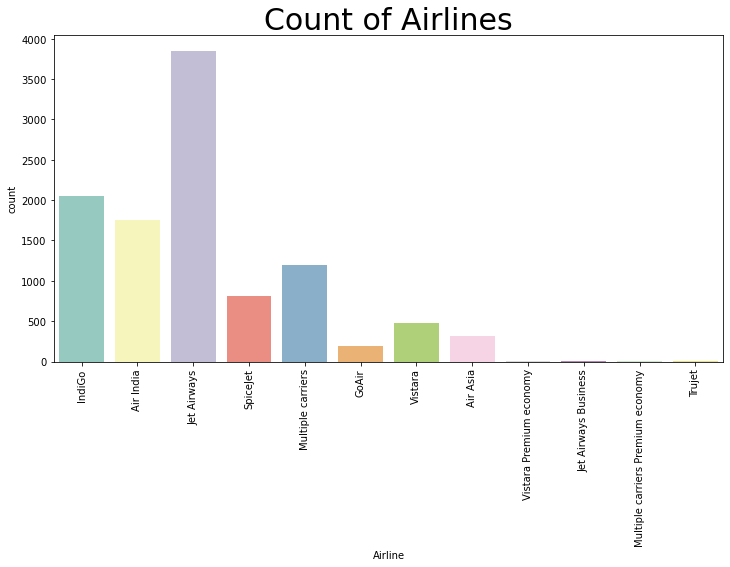

In [7]:
# Count of airlines

plt.figure(figsize=(12,6))
sns.countplot(df['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

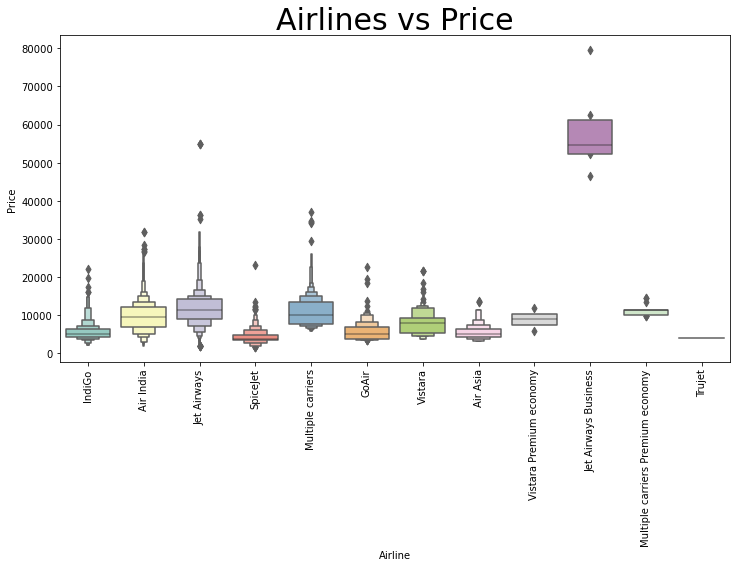

In [8]:
# Airlines vs Price

plt.figure(figsize=(12,6))
sns.boxenplot(df['Airline'], df['Price'], palette='Set3')
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

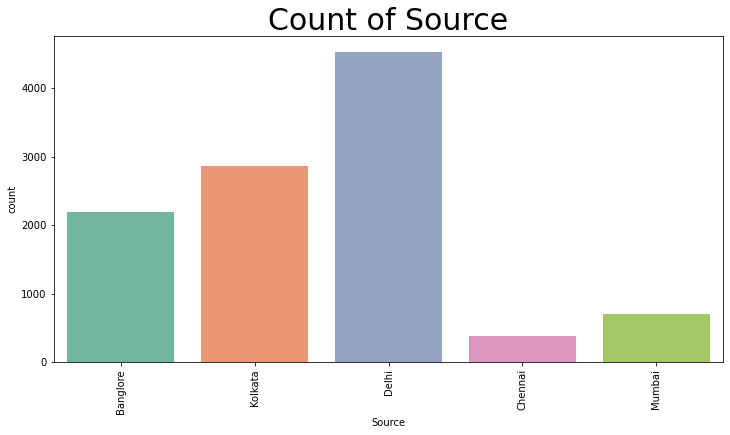

In [9]:
# Count plot of source

plt.figure(figsize=(12,6))
sns.countplot(df['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

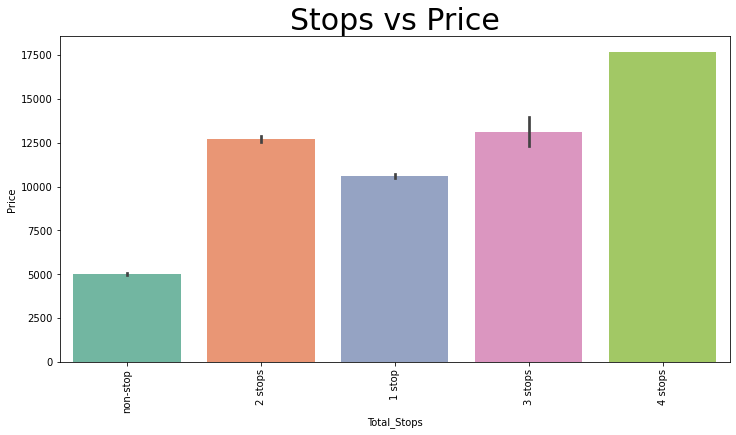

In [10]:
# Stops vs price

plt.figure(figsize=(12,6))
sns.barplot(df['Total_Stops'], df['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

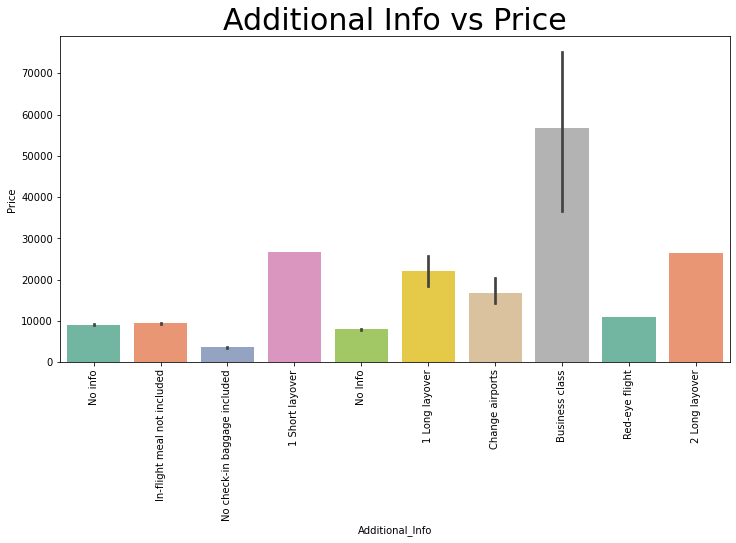

In [11]:
# Additional info vs price

plt.figure(figsize=(12,6))
sns.barplot(df['Additional_Info'], df['Price'], palette='Set2')
plt.title('Additional Info vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [12]:
# Handling Date and Time Variables

df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [13]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [14]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

**Insight : 
<br>• We have ‘Date_of_Journey’, a ‘date type variable and ‘Dep_Time’, ‘Arrival_Time’ that captures time information.**

**• We can extract ‘Journey_day’ and ‘Journey_Month’ from the ‘Date_of_Journey’ variable. ‘Journey day’ shows the day of the month on which the journey was started.**

**• Similarly, we can extract ‘Departure_Hour’ and ‘Departure_Minute’ as well as ‘Arrival_Hour and ‘Arrival_Minute’ from ‘Dep_Time’ and ‘Arrival_Time’ variables respectively.**

**• We also have duration information on the ‘Duration’ variable. This variable contains both duration hours and minutes information combined.**

In [15]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
df['Duration_hours']=df.Duration.apply(lambda x:get_duration(x)[0])
df['Duration_mins']=df.Duration.apply(lambda x:get_duration(x)[1])

**We can extract ‘Duration_hours’ and ‘Duration_minutes’ separately from the ‘Duration’ variable.**

Price                AxesSubplot(0.125,0.749828;0.227941x0.130172)
Journey_day       AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Journey_month     AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Dep_hour             AxesSubplot(0.125,0.593621;0.227941x0.130172)
Dep_min           AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Arrival_hour      AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Arrival_min          AxesSubplot(0.125,0.437414;0.227941x0.130172)
Duration_hours    AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Duration_mins     AxesSubplot(0.672059,0.437414;0.227941x0.130172)
dtype: object

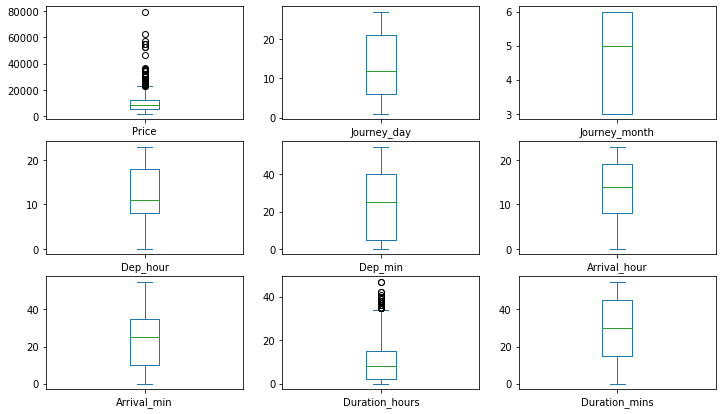

In [16]:
# Checking for 

df.plot(kind='box',subplots=True,figsize=(12,12),layout=(5,3))

**Insight : As we can see there are outliers present in 'Price' and 'Duration_hours' features and so we will be removing those outliers from our dataset**

In [17]:
# Calculating percentiles

q1 = np.percentile(df['Price'],25, interpolation = "midpoint")
q2 = np.percentile(df['Price'],50, interpolation = "midpoint")
q3 = np.percentile(df['Price'],75, interpolation = "midpoint")

print(" Q1 = {0} \n Q2 = {1} \n Q3 = {2}".format(q1,q2,q3))

 Q1 = 5277.0 
 Q2 = 8372.0 
 Q3 = 12373.0


In [18]:
# Calculating inter quartile range as well as the upper and lower limit of outliers

IQR=q3-q1
print('IQR = ',IQR)

low_lim=q1-(1.5*IQR)
up_lim=q3+(1.5*IQR)
print('Upper limit = ',up_lim,'\nLower limit = ',low_lim)

IQR =  7096.0
Upper limit =  23017.0 
Lower limit =  -5367.0


In [19]:
# Creating a list of outliers

outlier = []

for i in df['Price']:
    if (i>up_lim or i<low_lim):
        outlier.append(i)
        
print(outlier)

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [20]:
# Finding index values of outliers

df.loc[(df['Price']>up_lim ) | (df['Price']<low_lim)].index

Int64Index([  123,   396,   486,   510,   597,   628,   657,   785,   826,
              936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
             1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
             2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
             3535,  3700,  4012,  4521,  4829,  5013,  5136,  5372,  5439,
             5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,  6314,
             6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,  7537,
             7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,  8451,
             8470,  8536,  8598,  8940,  8957,  8990,  9019,  9193,  9239,
             9632,  9715,  9974, 10052, 10113, 10160, 10182, 10189, 10353,
            10364, 10383, 10439, 10511],
           dtype='int64')

In [21]:
# Removing the outliers

df.drop([123,   396,   486,   510,   597,   628,   657,   785,   826,
              936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
             1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
             2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
             3535,  3700,  4012,  4521,  4829,  5013,  5136,  5372,  5439,
             5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,  6314,
             6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,  7537,
             7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,  8451,
             8470,  8536,  8598,  8940,  8957,  8990,  9019,  9193,  9239,
             9632,  9715,  9974, 10052, 10113, 10160, 10182, 10189, 10353,
            10364, 10383, 10439, 10511],inplace=True)

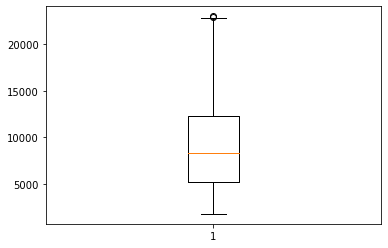

In [22]:
# Boxplot of 'Price' after removing outliers

plt.boxplot(df['Price'])
plt.show()

In [23]:
# Calculating percentiles

q1 = np.percentile(df['Duration_hours'],25, interpolation = "midpoint")
q2 = np.percentile(df['Duration_hours'],50, interpolation = "midpoint")
q3 = np.percentile(df['Duration_hours'],75, interpolation = "midpoint")

print(" Q1 = {0} \n Q2 = {1} \n Q3 = {2}".format(q1,q2,q3))

 Q1 = 2.0 
 Q2 = 8.0 
 Q3 = 15.0


In [24]:
# Calculating inter quartile range as well as the upper and lower limit of outliers

IQR=q3-q1
print('IQR = ',IQR)

low_lim=q1-(1.5*IQR)
up_lim=q3+(1.5*IQR)
print('Upper limit = ',up_lim,'\nLower limit = ',low_lim)

IQR =  13.0
Upper limit =  34.5 
Lower limit =  -17.5


In [25]:
# Creating a list of outliers

outlier = []

for i in df['Duration_hours']:
    if (i>up_lim or i<low_lim):
        outlier.append(i)
        
print(outlier)

[37, 38, 35, 35, 37, 36, 35, 47, 38, 35, 37, 37, 37, 37, 38, 36, 38, 38, 37, 37, 38, 38, 36, 35, 38, 38, 38, 38, 38, 38, 38, 35, 36, 37, 36, 38, 42, 38, 37, 39, 38, 38, 35, 37, 37, 38, 38, 37, 36, 38, 38, 41, 38, 38, 38, 42, 38, 38, 37, 36, 38, 37, 37, 38, 38, 38, 37, 39, 38, 40, 47, 38]


In [26]:
# Finding index values of outliers

df.loc[(df['Duration_hours']>up_lim ) | (df['Duration_hours']<low_lim)].index

Int64Index([  226,   553,   919,   925,   966,   969,   991,  1067,  1113,
             1318,  1346,  1442,  1496,  1551,  1657,  1791,  1804,  2172,
             2553,  2641,  2654,  2718,  3457,  3496,  3790,  3815,  3966,
             4047,  4118,  4463,  4655,  4785,  5516,  5711,  5782,  5933,
             5953,  6059,  6085,  6321,  6476,  6884,  7001,  7189,  7232,
             7306,  7329,  7553,  7611,  7612,  7876,  7906,  8127,  8153,
             8360,  8409,  8412,  8601,  8621,  8698,  8729,  9247,  9396,
             9484,  9551,  9673,  9703,  9848, 10020, 10326, 10456, 10639],
           dtype='int64')

In [27]:
df.drop([  226,   553,   919,   925,   966,   969,   991,  1067,  1113,
             1318,  1346,  1442,  1496,  1551,  1657,  1791,  1804,  2172,
             2553,  2641,  2654,  2718,  3457,  3496,  3790,  3815,  3966,
             4047,  4118,  4463,  4655,  4785,  5516,  5711,  5782,  5933,
             5953,  6059,  6085,  6321,  6476,  6884,  7001,  7189,  7232,
             7306,  7329,  7553,  7611,  7612,  7876,  7906,  8127,  8153,
             8360,  8409,  8412,  8601,  8621,  8698,  8729,  9247,  9396,
             9484,  9551,  9673,  9703,  9848, 10020, 10326, 10456, 10639],inplace=True)

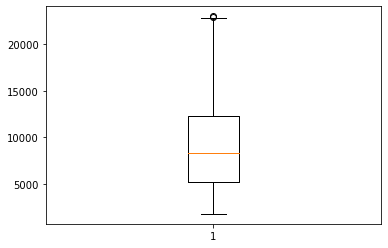

In [28]:
# Boxplot of 'Duration_hours' after removing outliers

plt.boxplot(df['Price'])
plt.show()

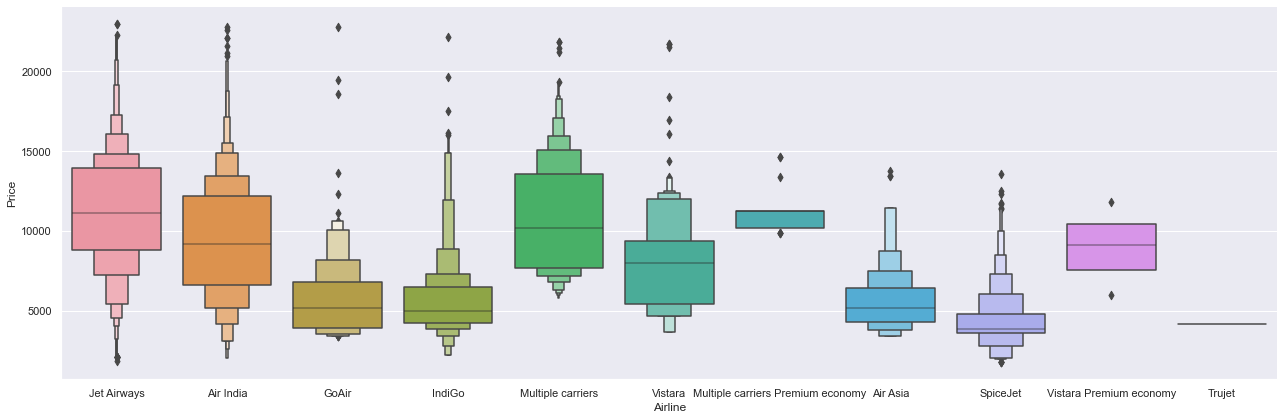

In [29]:
# Checking to see how the Airline variable is related to the Price variable.

sns.set()
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)

**Insight : As we can see the prices of airlines tickets varies among themselves**

**Since the Airline variable is Nominal Categorical Data (There is no order of any kind in airline names) we will use one-hot encoding to handle this variable.**

In [30]:
# One hot encoding

Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

In [31]:
# One hot encoding

Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

**Insight : Again ‘Source’ and ‘Destination’ variables are Nominal Categorical Data. We will use One-Hot encoding again to handle these two variables.**



In [32]:
# Feature Reduction

df.drop(["Route"], axis = 1, inplace = True)

**Insight : Route variable represents the path of the journey. Since the ‘Total_Stops’ variable captures the information if the flight is direct or connected so I have decided to drop this variable.**

In [33]:
# Checking for unique variables

df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

**Insight : Here, non-stop means 0 stops which means direct flight. Similarly meaning other values is obvious. We can see it is an Ordinal Categorical Data so we will use LabelEncoder here to handle this variable**

In [34]:
# Lable Encoding

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Total_Stops'] = encoder.fit_transform(df['Total_Stops'])

In [36]:
# Checking for unique values

df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', 'No Info', '1 Long layover',
       'Change airports', 'Red-eye flight'], dtype=object)

**Insight : As we can see, this feature captures relevant that can affect flight price significantly. Also ‘ No Info’ values are repeated. Let’s handle that first.**

In [37]:
df['Additional_Info'].replace({"No info": 'No Info'}, inplace = True)

**Insight : Now this variable is also Nominal Categorical Data. Let’s use One-Hot Encoding to handle this variable.**

In [38]:
# One hot encoding

Add_info = df[["Additional_Info"]]
Add_info = pd.get_dummies(Add_info, drop_first = True)

In [39]:
# Concatinating the columsn

df = pd.concat([df, Airline, Source, Destination,Add_info], axis = 1)
df.drop(["Airline", "Source", "Destination","Additional_Info"], axis = 1, inplace = True)

**Insight : we will create the final dataframe by concatenating all the One-hot and Label-encoded features to the original dataframe. We will also remove original variables using which we have prepared new encoded variables.**

In [40]:
df

,Date_of_Journey,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,24/03/2019,2h 50m,0,3897,24,3,22,20,1,10,...,0,0,0,0,1,0,0,1,0,0
1,1/05/2019,7h 25m,2,7662,1,5,5,50,13,15,...,0,0,0,0,0,0,0,1,0,0
2,9/06/2019,19h,2,13882,9,6,9,25,4,25,...,1,0,0,0,0,0,0,1,0,0
3,12/05/2019,5h 25m,1,6218,12,5,18,5,23,30,...,0,0,0,0,0,0,0,1,0,0
4,01/03/2019,4h 45m,1,13302,1,3,16,50,21,35,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9/04/2019,2h 30m,0,4107,9,4,19,55,22,25,...,0,0,0,0,0,0,0,1,0,0
10679,27/04/2019,2h 35m,0,4145,27,4,20,45,23,20,...,0,0,0,0,0,0,0,1,0,0
10680,27/04/2019,3h,0,7229,27,4,8,20,11,20,...,0,1,0,0,0,0,0,1,0,0
10681,01/03/2019,2h 40m,0,12648,1,3,11,30,14,10,...,0,0,0,0,1,0,0,1,0,0


# **Model Buidling**

In [41]:
# Splitting into dependent and independent variables

x=df.drop(['Price','Date_of_Journey','Duration'],axis=1)
y=df['Price']

In [42]:
# Splitting data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# **Models**

## **Random Forest Regressor**

In [61]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [62]:
y_pred =  reg_rf.predict(x_test)
print('Training Score :',reg_rf.score(x_train, y_train))
print('Test Score     :',reg_rf.score(x_test, y_test))

Training Score : 0.9856471515380951
Test Score     : 0.9233774740284795


## **XGBRegressor**

In [45]:
# XGBRegressor Model

from xgboost import XGBRegressor
xg =  XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [46]:
y_pred =  xg.predict(x_test)
print('Training Score :',xg.score(x_train, y_train))
print('Test Score     :',xg.score(x_test, y_test))

Training Score : 0.9721645903922762
Test Score     : 0.9305704495891662


## **Linear Regression**

In [47]:
# Linear regression model

from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred =  lr.predict(x_test)
print('Training Score :',lr.score(x_train, y_train))
print('Test Score     :',lr.score(x_test, y_test))

Training Score : 0.712640919566988
Test Score     : 0.705269228398217


## **Gradient Boosting Regressor**

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [50]:
y_pred =  gr.predict(x_test)
print('Training Score :',gr.score(x_train, y_train))
print('Test Score     :',gr.score(x_test, y_test))

Training Score : 0.850194875018276
Test Score     : 0.845725576312447


**Insight : Here ‘XGBRegressor’ and ‘RandomForestRegressor’ outperform other models significantly. It does take a high amount of training time with respect to other models.**

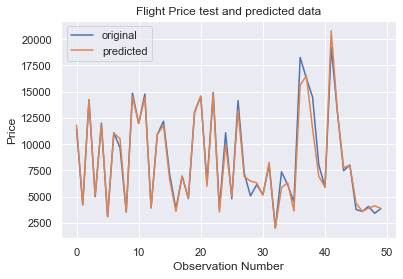

In [63]:
# Visualizing the results of few predictions

number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))
plt.plot(x_ax, y_test[:number_of_observations], label="original")
plt.plot(x_ax, y_pred[:number_of_observations], label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.legend()
plt.show()

**Insight : As we can observe in the above figure, model predictions and original prices are overlapping. This visual result confirms the high model score which we saw earlier**

In [52]:
# Train score, Test score, MAE, MSE, RMSE of Random Forest Regressor Model

reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

import sklearn.metrics as metrics

print(f'Train score {reg_rf.score(x_train, y_train)}')
print(f'Test score {reg_rf.score(x_test, y_test)}')
print("MAE:" , metrics.mean_absolute_error(y_test,reg_rf.predict(x_test)))
print("MSE:" , metrics.mean_squared_error(y_test,reg_rf.predict(x_test)))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,reg_rf.predict(x_test))))

Train score 0.9854907602916552
Test score 0.9226527319924306
MAE: 578.0453336229281
MSE: 1258105.5177481545
RMSE: 1121.6530291262777


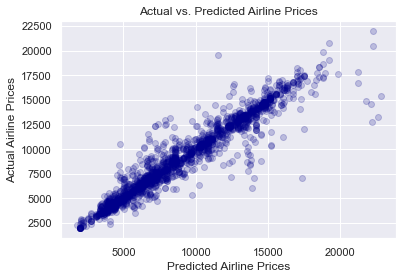

In [64]:
# Visualizing RandomForestRegressor

plt.scatter(y_test,y_pred,alpha =0.2,color="DarkBlue")
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices')
plt.ylabel('Actual Airline Prices');

## Model Fine Tuning

In [54]:
# Randomized search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [55]:
# Creating the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [56]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [57]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [59]:
prediction = rf_random.predict(x_test)

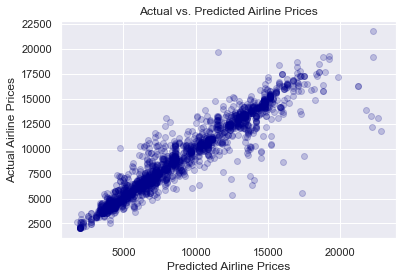

In [65]:
# After fine tuning

plt.scatter(y_test,prediction,alpha =0.2,color="DarkBlue")
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices')
plt.ylabel('Actual Airline Prices');

**Insight : Therefore, hyperparameter tuning did not improve the model**